### 📈  Variables in dataset
 1. Year: 2008
 2. Month: 11 (November)
 3. DayofMonth: 1-31
 4. DayOfWeek: 1 (Monday) - 7 (Sunday)
 5. DepTime: actual departure time (hhmm)
 6. CRSDepTime: scheduled departure time (hhmm)
 7. ArrTime: actual arrival time (hhmm)
 8. CRSArrTime: scheduled arrival time (hhmm)
 9. UniqueCarrier: unique carrier code
 10. FlightNum: flight number
 11. TailNum: plane tail number
 12. ActualElapsedTime: actual elapsed time of flight (estimated elapse time) in minutes
 13. CRSElapsedTime: CRS elapsed time of flight (estimated elapse time) in minutes
 14. AirTime: flight time in in minutes
 15. ArrDelay: TARGET -  difference in minutes between scheduled and actual arrival time, in minutes
 16. DepDelay: difference in minutes between scheduled and actual departure time, in minutes
 17. Origin: origin IATA airport code
 18. Dest: destination IATA airport code
 19. Distance: distance between airports (miles)
 20. TaxiIn: wheels down and arrival at the destination airport gate, in minutes
 21. TaxiOut: The time elapsed between departure from the origin airport gate and wheels off, in minutes
 22. Cancelled: was the flight cancelled?
 23. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 24. Diverted: 1 = yes, 0 = no
 25. CarrierDelay: carrier delay in minutes
 26. WeatherDelay: weather delay in minutes
 27. NASDelay: NAS delay in minutes
 28. SecurityDelay: security delayin minutes
 29. LateAircraftDelay: late aircraft delay in minutes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas_profiling
import sqlite3
%matplotlib inline

### We can load the full data from the file or a part of them

In [11]:
nRowsRead = None # specify number of rows to read - print None if want to read whole file
file_path = 'DelayedFlights.csv'
data = pd.read_csv(file_path, header=0, nrows=nRowsRead)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1936758 rows and 30 columns


In [12]:
data.head(5)

Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN           NaN      NaN   
1                 N         0           NaN           NaN      NaN   
2                 N         0           NaN           NaN      NaN   
3                 N         0           2.0           0.0      0.0   
4                 N         0           NaN           NaN      NaN   

  SecurityDelay  LateAircraftDelay  
0           NaN                NaN  
1           NaN                NaN  
2           NaN                NaN  
3           0.0               32.0  
4           NaN                NaN  

[5 rows x 30 columns]

In [17]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [18]:
data.head(5)

id  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   0  2008      1           3          4   2003.0        1955   2211.0   
1   1  2008      1           3          4    754.0         735   1002.0   
2   2  2008      1           3          4    628.0         620    804.0   
3   4  2008      1           3          4   1829.0        1755   1959.0   
4   5  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  CancellationCode  \
0        2225            WN  ...     4.0     8.0          0                 N   
1        1000            WN  ...     5.0    10.0          0                 N   
2         750            WN  ...     3.0    17.0          0                 N   
3        1925            WN  ...     3.0    10.0          0                 N   
4        2110            WN  ...     4.0    10.0          0                 N   

   Diverted  CarrierDelay  WeatherDelay NASDelay SecurityDelay  \
0         0           NaN           NaN      NaN           NaN   
1         0           NaN           NaN      NaN           NaN   
2         0           NaN           NaN      NaN           NaN   
3         0           2.0           0.0      0.0           0.0   
4         0           NaN           NaN      NaN           NaN   

   LateAircraftDelay  
0                NaN  
1                NaN  
2                NaN  
3               32.0  
4                NaN  

[5 rows x 30 columns]

In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

## Now lets try SQL 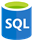  

### Create empty database using sqlite3 connector . The ‘Flight’ table will be used to store the information from our DataFrame

In [21]:
conn = sqlite3.connect('Flight_db') 
c = conn.cursor()

c.execute('''
          CREATE TABLE IF NOT EXISTS Flight
          ([id] INTEGER PRIMARY KEY, [Year] INTEGER, [Month] INTEGER, [DayofMonth] INTEGER,
          [DayOfWeek] INTEGER,[DepTime] FLOAT,[CRSDepTime] INTEGER,[ArrTime] FLOAT,
          [CRSArrTime] INTEGER,[UniqueCarrier] CHAR,[FlightNum] INTEGER,[TailNum] CHAR,[ActualElapsedTime] FLOAT,
          [CRSElapsedTime] FLOAT,[AirTime] FLOAT,[ArrDelay] FLOAT,[DepDelay] FLOAT,[Origin] CHAR,[Dest] CHAR,
          [Distance] INTEGER,[TaxiIn] FLOAT,[TaxiOut] FLOAT,[Cancelled] INTEGER,
          [CancellationCode] CHAR,[Diverted] INTEGER,[CarrierDelay] FLOAT,[WeatherDelay] FLOAT,
          [NASDelay] FLOAT,[SecurityDelay] FLOAT,[LateAircraftDelay] FLOAT)
          ''')
          
conn.commit()

In [22]:
data.to_sql('Flight_db', conn, if_exists='replace', index = False)

1936758

### I will display by month the total number of cancelled flights, average flight distance, minimum arrival delay in hours (if negative it's early arrival), maximum arrival delay in hours, number of unique codes for cancelled flights and number of flights (by counting number of days with flights)

In [42]:
c.execute('''  
SELECT Month,
       sum(Cancelled),
       ROUND(AVG(Distance)),
       ROUND(min(ArrDelay)/60),
       ROUND(max(ArrDelay)/60),
       count(DISTINCT CancellationCode),
       count(DayofMonth)
FROM Flight_db
GROUP BY Month
ORDER BY "SUM(Cancelled)" DESC
          ''')

for row in c.fetchall():
    print (row)

(12, 480, 757.0, -1.0, 28.0, 4, 203385)
(11, 94, 751.0, -1.0, 22.0, 4, 105563)
(10, 59, 759.0, -1.0, 23.0, 4, 103525)
(9, 0, 758.0, -1.0, 26.0, 1, 95539)
(8, 0, 799.0, -1.0, 23.0, 1, 162648)
(7, 0, 781.0, -2.0, 25.0, 1, 182945)
(6, 0, 777.0, -1.0, 28.0, 1, 200914)
(5, 0, 777.0, -1.0, 33.0, 1, 153072)
(4, 0, 767.0, -1.0, 41.0, 1, 155264)
(3, 0, 762.0, -1.0, 25.0, 1, 200842)
(2, 0, 742.0, -1.0, 41.0, 1, 189534)
(1, 0, 751.0, -1.0, 25.0, 1, 183527)


### Again, in October-December you can see a lot of delays with all 4 types of cancellation codes

In [44]:
c.execute('''  
SELECT *
FROM Flight_db
WHERE UniqueCarrier LIKE 'B%'
          ''')

for row in c.fetchall():
    print (row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(6955546, 2008, 12, 2, 2, 920.0, 815, 1152.0, 1051, 'B6', 592, 'N265JB', 152.0, 156.0, 116.0, 61.0, 65.0, 'MCO', 'HPN', 972, 20.0, 16.0, 0, 'N', 0, 61.0, 0.0, 0.0, 0.0, 0.0)
(6955550, 2008, 12, 2, 2, 1210.0, 1150, 1400.0, 1355, 'B6', 334, 'N590JB', 110.0, 125.0, 92.0, 5.0, 20.0, 'MCO', 'IAD', 758, 5.0, 13.0, 0, 'N', 0, None, None, None, None, None)
(6955552, 2008, 12, 2, 2, 1524.0, 1505, 1741.0, 1749, 'B6', 44, 'N659JB', 137.0, 164.0, 115.0, -8.0, 19.0, 'MCO', 'JFK', 944, 7.0, 15.0, 0, 'N', 0, None, None, None, None, None)
(6955553, 2008, 12, 2, 2, 1126.0, 1045, 1324.0, 1311, 'B6', 46, 'N509JB', 118.0, 146.0, 100.0, 13.0, 41.0, 'MCO', 'JFK', 944, 3.0, 15.0, 0, 'N', 0, None, None, None, None, None)
(6955557, 2008, 12, 2, 2, 1403.0, 1340, 1613.0, 1619, 'B6', 78, 'N583JB', 130.0, 159.0, 108.0, -6.0, 23.0, 'MCO', 'JFK', 944, 5.0, 17.0, 0, 'N', 0, None, None, None, None, None)
(6955560, 2008, 12, 2, 2, 1832.0, 1820, 2059.0, 2102, 'B6', 818, 'N703JB', 147.0, 162.0, 118.0, -3.0, 12.0, 'MCO', 

In [61]:
c.execute('''  
WITH Cancellations AS 
    (SELECT * FROM Flight_db WHERE Cancelled = 1), 
CC AS
     (SELECT * FROM Cancellations WHERE CancellationCode LIKE 'B%' OR CancellationCode LIKE 'C%' OR CancellationCode LIKE 'A%'),
Distance AS 
    (SELECT * FROM CC WHERE Distance > 2000 )
SELECT CancellationCode, Distance 
FROM Distance
ORDER BY CancellationCode ASC
          ''')

for row in c.fetchall():
    print (row)

('A', 2569)
('A', 2358)
('A', 2072)
('A', 2066)
('A', 2136)
('A', 2306)
('A', 2369)
('A', 2603)
('A', 2496)
('A', 2588)
('A', 2565)
('A', 2401)
('B', 2176)
('B', 2378)
('B', 2677)
('B', 2611)
('B', 2175)
('B', 2421)
('B', 2401)
('B', 2227)
('C', 2433)
('C', 2153)


In [55]:
c.execute('''  
SELECT Month, DayofMonth,
sum(Cancelled) over sum_Cancelled AS sum_Cancelled
FROM Flight_db
WINDOW sum_Cancelled 
AS 
(order by Month, DayofMonth ASC
RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
          ''')

for row in c.fetchall():
    print (row)

(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)
(1, 1, 0)


(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)
(1, 21, 0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)
(10, 16, 23)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 28, 618)
(12, 

In [56]:
c.execute('''  
SELECT UniqueCarrier, Dest,
PERCENT_RANK() over w
FROM Flight_db
GROUP BY UniqueCarrier
WINDOW w 
AS 
(order by UniqueCarrier, Dest ASC)
          ''')

for row in c.fetchall():
    print (row)

('9E', 'AUS', 0.0)
('AA', 'LAX', 0.05263157894736842)
('AQ', 'OGG', 0.10526315789473684)
('AS', 'SEA', 0.15789473684210525)
('B6', 'BOS', 0.21052631578947367)
('CO', 'ORD', 0.2631578947368421)
('DL', 'ATL', 0.3157894736842105)
('EV', 'BUF', 0.3684210526315789)
('F9', 'MSP', 0.42105263157894735)
('FL', 'BMI', 0.47368421052631576)
('HA', 'HNL', 0.5263157894736842)
('MQ', 'SAN', 0.5789473684210527)
('NW', 'LGA', 0.631578947368421)
('OH', 'DSM', 0.6842105263157895)
('OO', 'CVG', 0.7368421052631579)
('UA', 'HNL', 0.7894736842105263)
('US', 'CLT', 0.8421052631578947)
('WN', 'TPA', 0.8947368421052632)
('XE', 'EWR', 0.9473684210526315)
('YV', 'ORD', 1.0)
